# Monty Hall Problem

- You are in a game show. There are 3 closed doors, 2 are empty, and 1 leads to a car.
- Host tells you to pick a door.
- You pick a door without opening it yet.
- Host opens 1 of the other 2 doors you didn't pick to reveal an empty door.
- Host gives you an option to either switch door or stay with you pick.

Is it better to switch or not to switch? We can find the answer using simulation.

In [1]:
import random
import matplotlib.pyplot as plt

In [2]:
def simulate(nd, switch):
    door = random.randrange(nd)

    pi = randelem([i for i in range(nd)])
    ri = randelem([i for i in range(nd) if i != pi and i != door])
    if switch:
        pi = randelem([i for i in range(nd) if i != pi and i != ri])
    return pi == door

def randelem(list):
    i = random.randrange(len(list))
    return list[i]

In [43]:
door_counts = [3, 6, 10, 20]
experiment_counts = [i*10 for i in range(1, 1001)]
results = {}

for doors in door_counts:
    for experiments in experiment_counts:
        noswitch = []
        switch = []
        
        for i in range(experiments):
            noswitch.append(simulate(doors, False))
            switch.append(simulate(doors, True))
            
        results[('noswitch', doors, experiments)] = sum(noswitch)/experiments
        results[('switch', doors, experiments)] = sum(switch)/experiments

## Simulation results

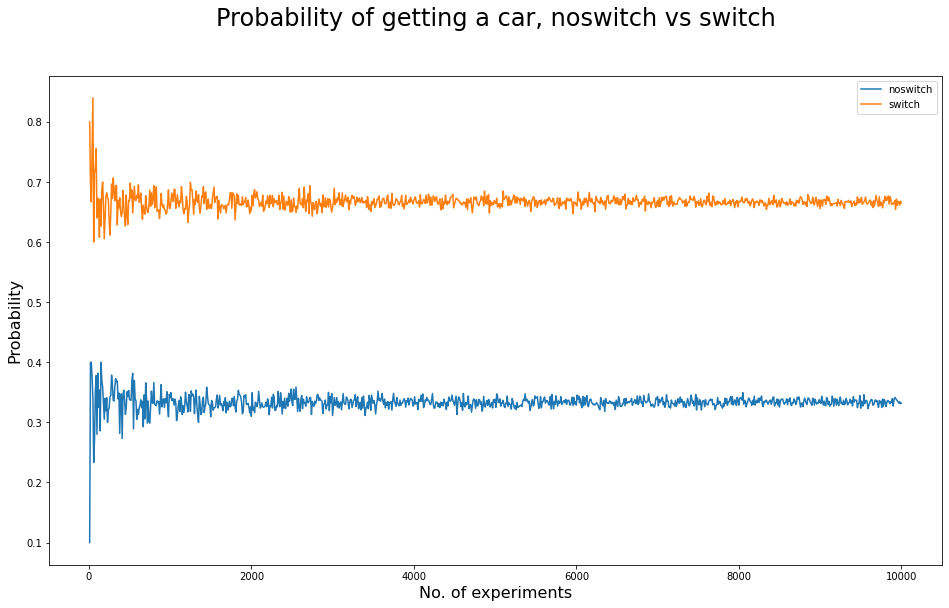

In [44]:
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(experiment_counts, [results[('noswitch', 3, ec)] for ec in experiment_counts], label='noswitch')
ax.plot(experiment_counts, [results[('switch', 3, ec)] for ec in experiment_counts], label='switch')

ax.set_title('Probability of getting a car, noswitch vs switch', fontsize=24, pad=50)
ax.set_xlabel('No. of experiments', fontsize=16)
ax.set_ylabel('Probability', fontsize=16)
ax.legend()

It's better to switch! You have 66% chance of getting a car if you switch, vs 33% if you don't switch.

## How is that possible?

You might think that both switching and non-switching should result in the same probability, because there's only 2 doors left, so it's 50-50 either way.

The reason why this is false has to do with the difference between frequentist vs Bayesian statistics. TL;DR: Bayesian statistics is better suited for reasoning about this specific problem.

If you were to increase the number of doors, eventually either strategy will converge with the same probability.

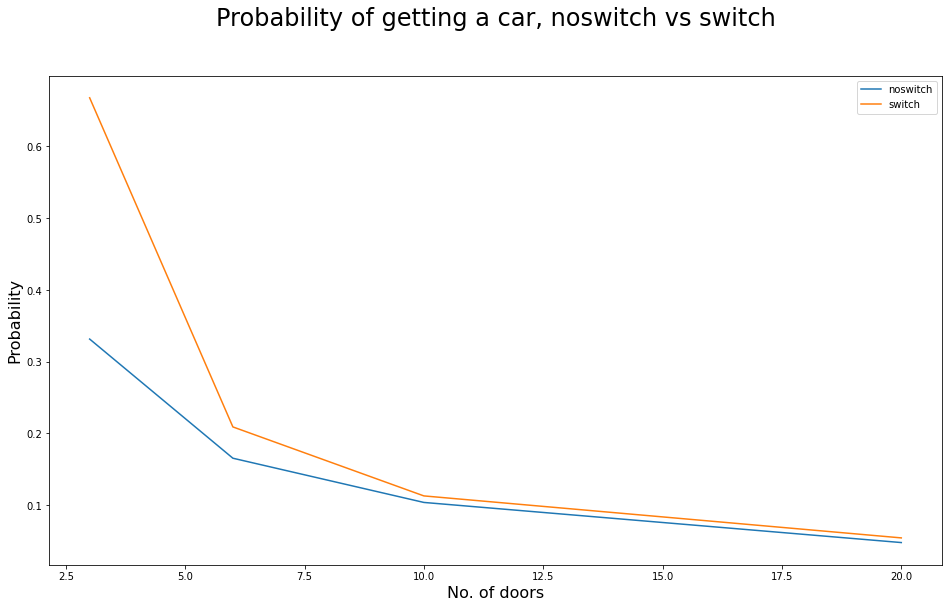

In [45]:
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(door_counts, [results[('noswitch', d, 9990)] for d in door_counts], label='noswitch')
ax.plot(door_counts, [results[('switch', d, 9990)] for d in door_counts], label='switch')

ax.set_title('Probability of getting a car, noswitch vs switch', fontsize=24, pad=50)
ax.set_xlabel('No. of doors', fontsize=16)
ax.set_ylabel('Probability', fontsize=16)
ax.legend()